# Wavelength calibration

This notebook contains the instructions to process the laboratory data in order to obtain the wavelength calibration for a series.


# Step 0. Adjust headers

The 29 - 33 have the filter from M1 and the order M2.
The header has not been updated to the new convention, so the pipeline will interpret as order 1 instead of order 2.

- Change G_ORD_B to 2
- Add keyword to remind that filter is the M1 filter, not the M2: G_FLT_B = 1


In [4]:
# Filter of the other order 

from glob import glob as gb
from astropy.io import fits
import os

rootdir = '/home/dario/FIFI-LS/Calibration/OC9T/wavcal/'
gcs = [18,19,20,21]

for gc in gcs:
    files = gb(os.path.join(rootdir,'**','*GC'+str(gc)+'*sw.fits'), recursive=True)
    for file in files:
        with fits.open(file, mode='update') as hdl:
            header = hdl[0].header
            header['G_ORD_B'] = 2
            header['G_FLT_B'] = 1

Change name of series of files with wrong name.

## Step 1. Data reduction

It is possible to reduce only part of the data by selecting a list of numbers (of the GC, gas cells) names
and limiting to a channel (e.g. 'sw' in the example).

```
from fifipy.wavecal import reduceData
rootdir = '../202002WaveCalData/'
reduceData(rootdir,names=[26],channels=['sw'])
```

Otherwise, the entire reduction can be done in one shot.

In [1]:
from fifipy.wavecal import reduceData
rootdir = '/home/dario/FIFI-LS/Calibration/OC9T/wavcal/'
reduceData(rootdir)


In GC 1 0  there are  134 sw files
number of files  134
0.........1.........2.........3.........4.........5.........6.........7.........8.........9.........10.........11.........12.........13...
In GC 2 0  there are  217 sw files
number of files  217
0.........1.........2.........3.........4.........5.........6.........7.........8.........9.........10.........11.........12.........13.........14.........15.........16.........17.........18.........19.........20.........21......
In GC 3 0  there are  251 sw files
number of files  251
0.........1.........2.........3.........4.........5.........6.........7.........8.........9.........10.........11.........12.........13.........14.........15.........16.........17.........18.........19.........20.........21.........22.........23.........24.........25
In GC 4 0  there are  217 sw files
number of files  217
0.........1.........2.........3.........4.........5.........6.........7.........8.........9.........10.........11.........12.........13...

In [4]:
from fifipy.wavecal import reduceData
rootdir = '/home/dario/FIFI-LS/Calibration/OC9T/wavcal/'
reduceData(rootdir, names=[10,11,12,13,14,15,16,17])


In GC 10 0  there are  200 sw files
number of files  200
0.........1.........2.........3.........4.........5.........6.........7.........8.........9.........10.........11.........12.........13.........14.........15.........16.........17.........18.........19.........
In GC 11 0  there are  284 sw files
number of files  284
0.........1.........2.........3.........4.........5.........6.........7.........8.........9.........10.........11.........12.........13.........14.........15.........16.........17.........18.........19.........20.........21.........22.........23.........24.........25.........26.........27.........28...
In GC 12 0  there are  351 sw files
number of files  351
0.........1.........2.........3.........4.........5.........6.........7.........8.........9.........10.........11.........12.........13.........14.........15.........16.........17.........18.........19.........20.........21.........22.........23.........24.........25.........26.........27.........28.........29..

In [5]:
from fifipy.wavecal import reduceData
rootdir = '/home/dario/FIFI-LS/Calibration/OC9T/wavcal/'
reduceData(rootdir, names=[10,22,23,24,25,26,27,28])


In GC 10 0  there are  401 sw files
number of files  401
0.........1.........2.........3.........4.........5.........6.........7.........8.........9.........10.........11.........12.........13.........14.........15.........16.........17.........18.........19.........20.........21.........22.........23.........24.........25.........26.........27.........28.........29.........30.........31.........32.........33.........34.........35.........36.........37.........38.........39.........40
In GC 22 0  there are  134 sw files
number of files  134
0.........1.........2.........3.........4.........5.........6.........7.........8.........9.........10.........11.........12.........13...
In GC 23 0  there are  217 sw files
number of files  217
0.........1.........2.........3.........4.........5.........6.........7.........8.........9.........10.........11.........12.........13.........14.........15.........16.........17.........18.........19.........20.........21......
In GC 24 0  there are  251

FileNotFoundError: [Errno 2] No such file or directory: '/home/dario/FIFI-LS/Calibration/OC9T/wavcal/20220813_160756/00005_162910_GC10-G_STRT_B-090000_lw.fits'

In [6]:
from fifipy.wavecal import reduceData
rootdir = '/home/dario/FIFI-LS/Calibration/OC9T/wavcal/'
reduceData(rootdir, names=[22,23,24,25,26,27,28],channels=['lw'])


In GC 22 0  there are  134 lw files
number of files  134
0.........1.........2.........3.........4.........5.........6.........7.........8.........9.........10.........11.........12.........13...
In GC 23 0  there are  217 lw files
number of files  217
0.........1.........2.........3.........4.........5.........6.........7.........8.........9.........10.........11.........12.........13.........14.........15.........16.........17.........18.........19.........20.........21......
In GC 24 0  there are  251 lw files
number of files  251
0.........1.........2.........3.........4.........5.........6.........7.........8.........9.........10.........11.........12.........13.........14.........15.........16.........17.........18.........19.........20.........21.........22.........23.........24.........25
In GC 25 0  there are  234 lw files
number of files  234
0.........1.........2.........3.........4.........5.........6.........7.........8.........9.........10.........11.........12.........1

In [8]:
from fifipy.wavecal import reduceData
rootdir = '/home/dario/FIFI-LS/Calibration/OC9T/wavcal/'
reduceData(rootdir, names=[10])


In GC 10 0  there are  201 sw files
number of files  201
0.........1.........2.........3.........4.........5.........6.........7.........8.........9.........10.........11.........12.........13.........14.........15.........16.........17.........18.........19.........20
In GC 10 0  there are  201 lw files
number of files  201
0.........1.........2.........3.........4.........5.........6.........7.........8.........9.........10.........11.........12.........13.........14.........15.........16.........17.........18.........19.........20

## Step 2. Check the coverage

Plot the central pixel of the central spaxel for the different combinations.

Solid line is dichroic 130, dashed line is dichroic 105.

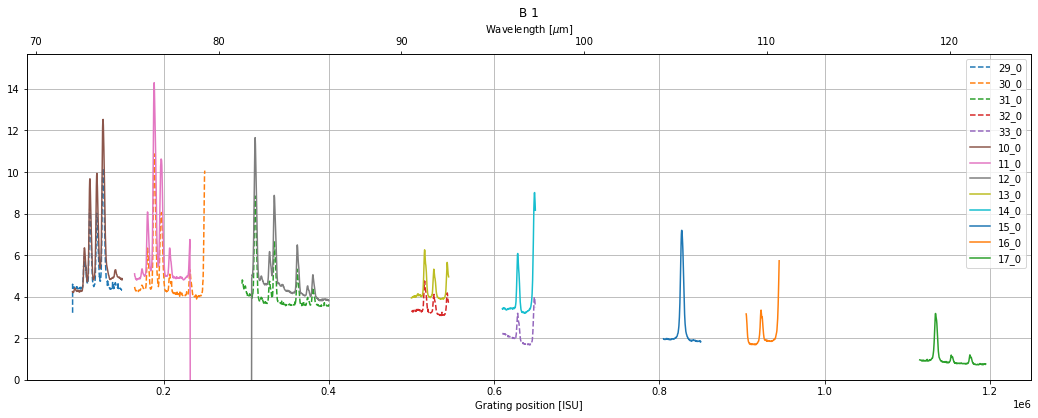

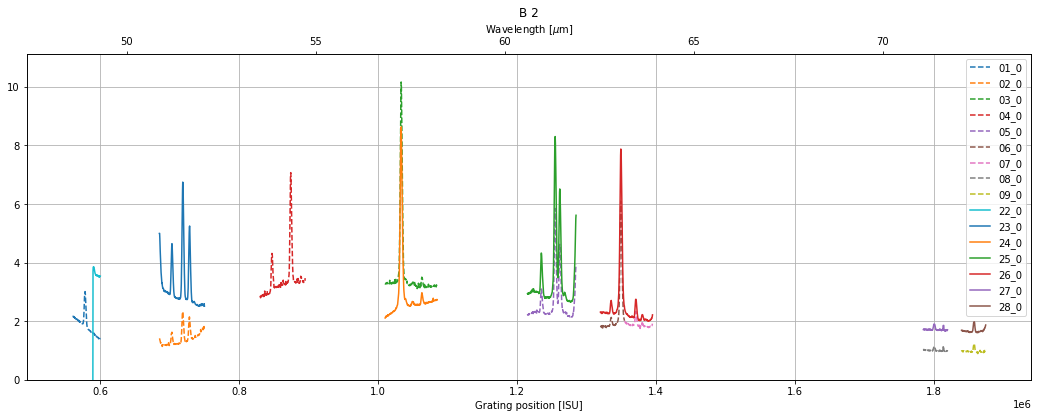

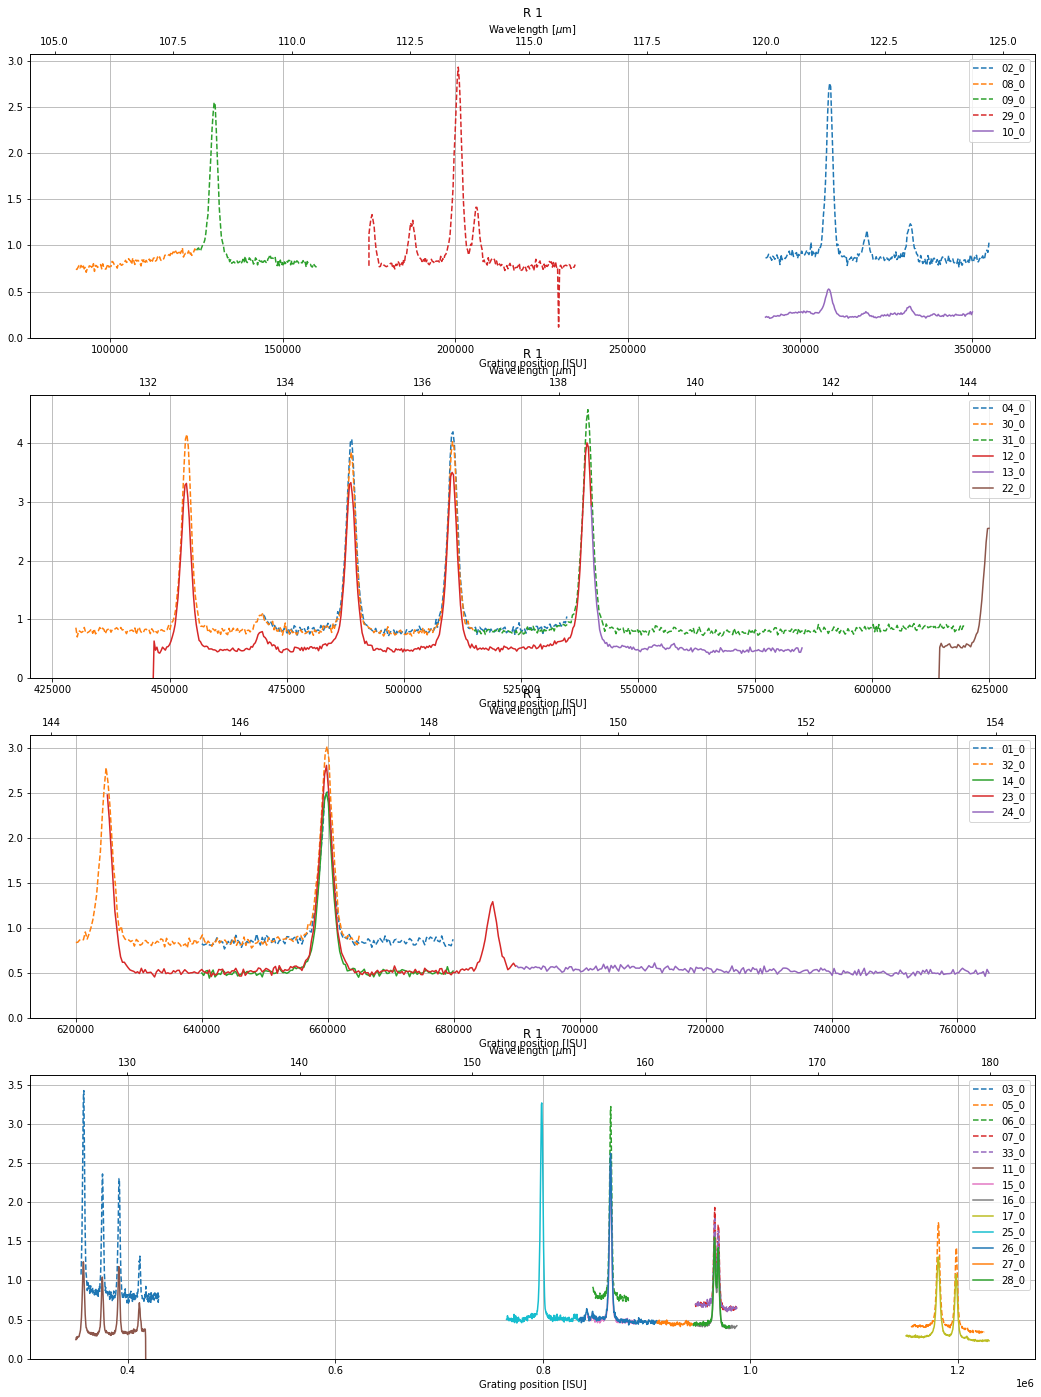

In [9]:
%matplotlib inline
from fifipy.wavecal import plotLines

rootdir = '/home/dario/FIFI-LS/Calibration/OC9T/wavcal/'
plotLines(rootdir,'B',1)
plotLines(rootdir,'B',2)
plotLines(rootdir,'R',1)

## Step 3. Merge files

In same cases an observation is done in two parts. These cases have to be merged before fitting the lines, otherwise the fitting is difficult and incorrect in some pixels.

In this case the blue seems OK.
The red has a few mergings:
- B    6_0 +  7_0 ->  6_1
- R    8_0 +  9_0 ->  8_1
- R   12_0 + 13_0 -> 12_1
- R   22_0 + 23_0 -> 22_1
- R   22_1 + 24_0 -> 22_2
- R    6_0 + 21_0 ->  6_1

In [11]:
from fifipy.wavecal import mergeFiles
rootdir = '/home/dario/FIFI-LS/Calibration/OC9T/wavcal/Reduced/'
infile1 = rootdir + 'B2_105_GC06_0.fits'
infile2 = rootdir + 'B2_105_GC07_0.fits'
outfile = rootdir + 'B2_105_GC06_1.fits'
mergeFiles(infile1, infile2, outfile)

In [12]:
from fifipy.wavecal import mergeFiles
rootdir = '/home/dario/FIFI-LS/Calibration/OC9T/wavcal/Reduced/'
infile1 = rootdir + 'R1_105_GC08_0.fits'
infile2 = rootdir + 'R1_105_GC09_0.fits'
outfile = rootdir + 'R1_105_GC08_1.fits'
mergeFiles(infile1, infile2, outfile)

In [13]:
from fifipy.wavecal import mergeFiles
rootdir = '/home/dario/FIFI-LS/Calibration/OC9T/wavcal/Reduced/'
infile1 = rootdir + 'R1_130_GC12_0.fits'
infile2 = rootdir + 'R1_130_GC13_0.fits'
outfile = rootdir + 'R1_130_GC12_1.fits'
mergeFiles(infile1, infile2, outfile)

In [14]:
from fifipy.wavecal import mergeFiles
rootdir = '/home/dario/FIFI-LS/Calibration/OC9T/wavcal/Reduced/'
infile1 = rootdir + 'R1_130_GC22_0.fits'
infile2 = rootdir + 'R1_130_GC23_0.fits'
outfile = rootdir + 'R1_130_GC22_1.fits'
mergeFiles(infile1, infile2, outfile)

In [15]:
from fifipy.wavecal import mergeFiles
rootdir = '/home/dario/FIFI-LS/Calibration/OC9T/wavcal/Reduced/'
infile1 = rootdir + 'R1_130_GC22_1.fits'
infile2 = rootdir + 'R1_130_GC24_0.fits'
outfile = rootdir + 'R1_130_GC22_2.fits'
mergeFiles(infile1, infile2, outfile)

Move unused files away.

In [16]:
import os
rootdir = '/home/dario/FIFI-LS/Calibration/OC9T/wavcal/Reduced/'
os.mkdir(rootdir+'OLD')

files = [
    'B2_105_GC06_0.fits',
    'B2_105_GC07_0.fits',
    'R1_105_GC08_0.fits',
    'R1_105_GC09_0.fits',
    'R1_130_GC12_0.fits',
    'R1_130_GC13_0.fits',
    'R1_130_GC22_0.fits',
    'R1_130_GC23_0.fits',
    'R1_130_GC22_1.fits',
    'R1_130_GC24_0.fits',
#    'R1_105_GC06_0.fits',
#    'R1_105_GC21_0.fits',
#    'B2_105_GC08_0.fits',
#    'B2_105_GC08_1.fits',
#    'B2_130_GC26_1.fits',
#    'B2_130_GC28_0.fits',
]


for file in files:
    os.rename(rootdir+file, rootdir + 'OLD/'+file)

FileNotFoundError: [Errno 2] No such file or directory: '/home/dario/FIFI-LS/Calibration/OC9T/wavcal/Reduced/R1_105_GC21_0.fits' -> '/home/dario/FIFI-LS/Calibration/OC9T/wavcal/Reduced/OLD/R1_105_GC21_0.fits'

Double check

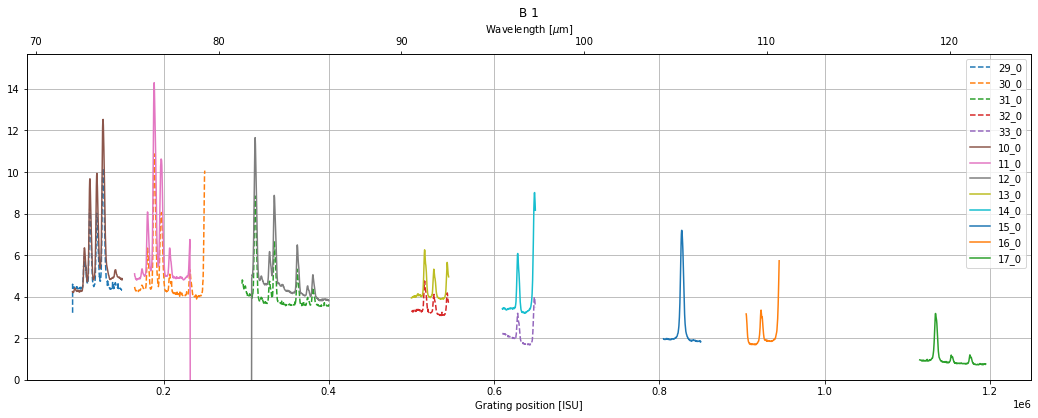

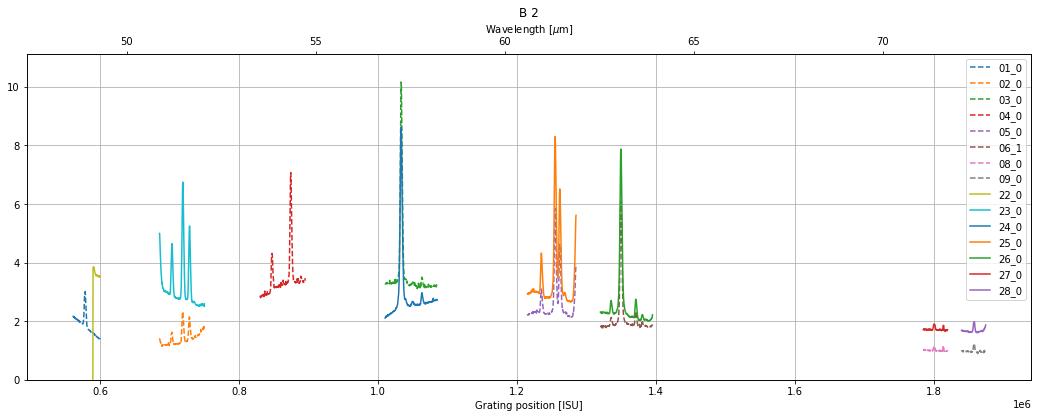

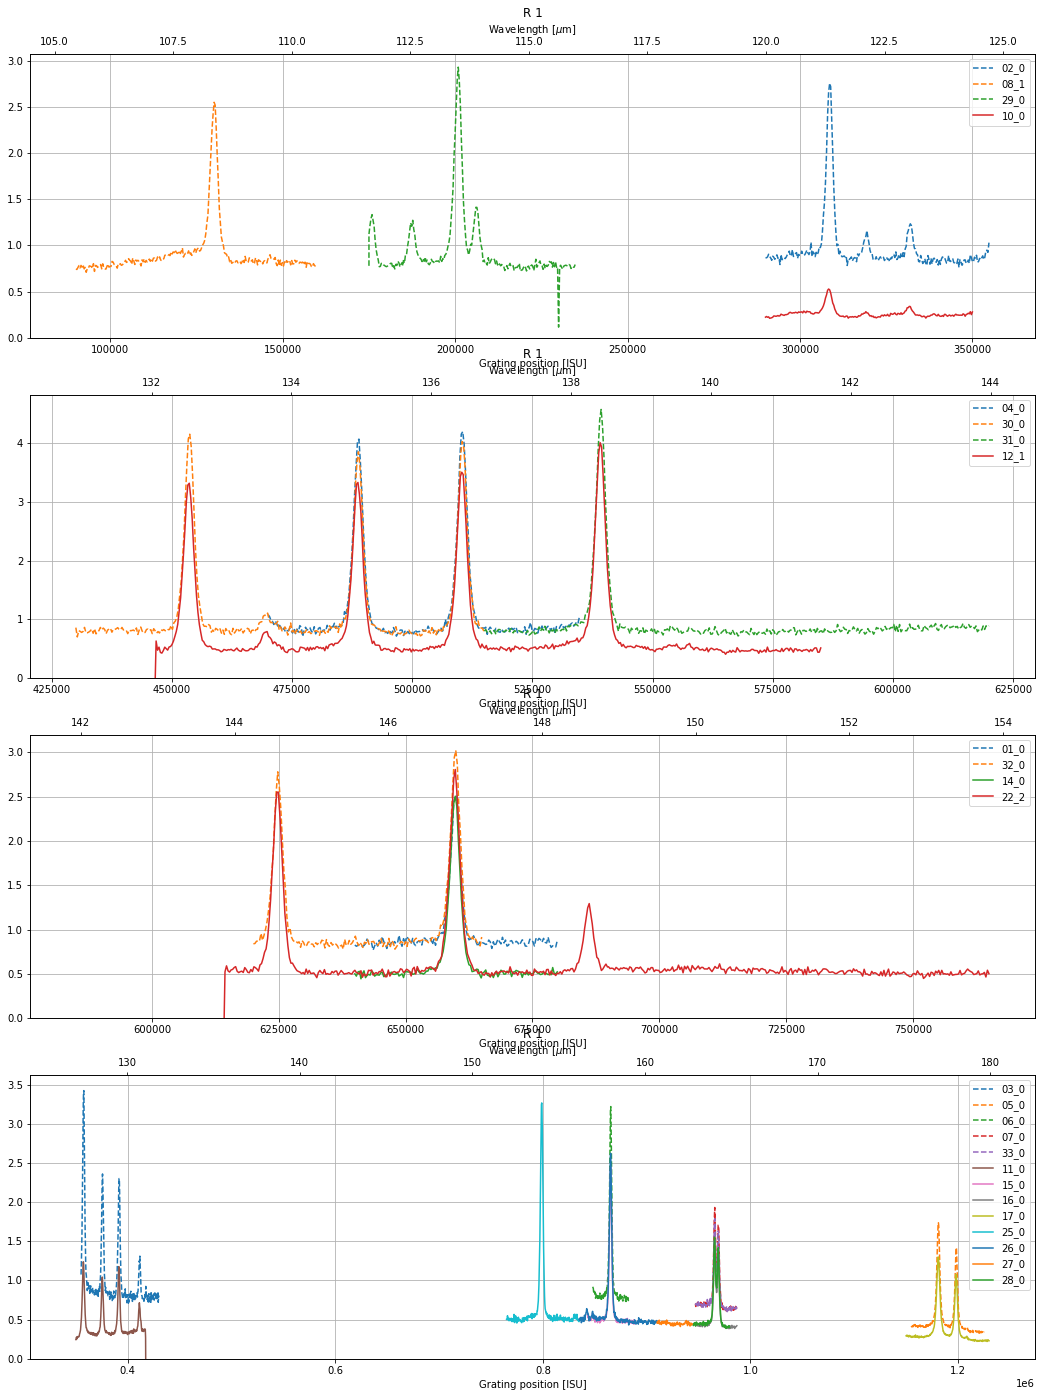

In [17]:
%matplotlib inline
from fifipy.wavecal import plotLines

rootdir = '/home/dario/FIFI-LS/Calibration/OC9T/wavcal/'
plotLines(rootdir,'B',1)
plotLines(rootdir,'B',2)
plotLines(rootdir,'R',1)

## Step 4. Fit the cubes

It is possible to fit a single cube and show the results.

```
%matplotlib inline
from fifipy.wavecal import fitData
rootdir = '../202002WaveCalData/Reduced/' 
infile = rootdir + 'R1_105_GC33_0.fits'
fitData(infile, plot=True)
```
Otherwise, the entire fitting can be done in one shot.
The results are conserved in pdf files with the same names which can be inspected to check the quality of the fits.

In [1]:
# Fit of all the data
from fifipy.wavecal import fitData
from glob import glob as gb
import os 
rootdir = '/home/dario/FIFI-LS/Calibration/OC9T/wavcal/Reduced/'
infiles = gb(os.path.join(rootdir,'*.fits'))
nfiles = len(infiles)
for k, infile in enumerate(infiles):
    print(str(nfiles-k)+' '+infile+' ', end='')
    fitData(infile, plot=False)
    print('')

53 /home/dario/FIFI-LS/Calibration/OC9T/wavcal/Reduced/B2_105_GC05_0.fits BLUE 2   ................
52 /home/dario/FIFI-LS/Calibration/OC9T/wavcal/Reduced/B2_105_GC04_0.fits BLUE 2   ................
51 /home/dario/FIFI-LS/Calibration/OC9T/wavcal/Reduced/B2_105_GC09_0.fits BLUE 2   ................
50 /home/dario/FIFI-LS/Calibration/OC9T/wavcal/Reduced/R1_105_GC08_1.fits RED 1   ................
49 /home/dario/FIFI-LS/Calibration/OC9T/wavcal/Reduced/R1_130_GC26_0.fits RED 1   ................
48 /home/dario/FIFI-LS/Calibration/OC9T/wavcal/Reduced/R1_105_GC06_0.fits RED 1   ................
47 /home/dario/FIFI-LS/Calibration/OC9T/wavcal/Reduced/B1_105_GC33_0.fits BLUE 1   ................
46 /home/dario/FIFI-LS/Calibration/OC9T/wavcal/Reduced/B2_130_GC27_0.fits BLUE 2   ................
45 /home/dario/FIFI-LS/Calibration/OC9T/wavcal/Reduced/B2_105_GC01_0.fits BLUE 2   ................
44 /home/dario/FIFI-LS/Calibration/OC9T/wavcal/Reduced/B2_105_GC03_0.fits BLUE 2   ................
43 

ValueError: Parameter 'l1_amplitude' has min == max

In [2]:
# Fit of all the data
from fifipy.wavecal import fitData
from glob import glob as gb
import os 
rootdir = '/home/dario/FIFI-LS/Calibration/OC9T/wavcal/Reduced/'
infiles = gb(os.path.join(rootdir,'*.fits'))
nfiles = len(infiles)
for k, infile in enumerate(infiles):
    print(str(nfiles-k)+' '+infile+' ', end='')
    fitData(infile, plot=False)
    print('')

53 /home/dario/FIFI-LS/Calibration/OC9T/wavcal/Reduced/B2_105_GC05_0.fits BLUE 2   ................
52 /home/dario/FIFI-LS/Calibration/OC9T/wavcal/Reduced/B2_105_GC04_0.fits BLUE 2   ................
51 /home/dario/FIFI-LS/Calibration/OC9T/wavcal/Reduced/B2_105_GC09_0.fits BLUE 2   ................
50 /home/dario/FIFI-LS/Calibration/OC9T/wavcal/Reduced/R1_105_GC08_1.fits RED 1   ................
49 /home/dario/FIFI-LS/Calibration/OC9T/wavcal/Reduced/R1_130_GC26_0.fits RED 1   ................
48 /home/dario/FIFI-LS/Calibration/OC9T/wavcal/Reduced/R1_105_GC06_0.fits RED 1   ................
47 /home/dario/FIFI-LS/Calibration/OC9T/wavcal/Reduced/B1_105_GC33_0.fits BLUE 1   ................
46 /home/dario/FIFI-LS/Calibration/OC9T/wavcal/Reduced/B2_130_GC27_0.fits BLUE 2   ................
45 /home/dario/FIFI-LS/Calibration/OC9T/wavcal/Reduced/B2_105_GC01_0.fits BLUE 2   ................
44 /home/dario/FIFI-LS/Calibration/OC9T/wavcal/Reduced/B2_105_GC03_0.fits BLUE 2   ................
43 

In [3]:
# Test on single file
#from fifipy.wavecal import fitData
#infile='/home/dario/FIFI-LS/Calibration/OC9T/wavcal/Reduced/B2_130_GC23_0.fits'
#fitData(infile, plot=False,multi=False)

Filename: /home/dario/FIFI-LS/Calibration/OC9T/wavcal/Reduced/B2_130_GC23_0.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU       8   ()      
  1  Grating Position    1 ImageHDU         7   (217,)   float64   
  2  SPECS         1 ImageHDU         9   (25, 16, 217)   float64   
  3  WAVE          1 ImageHDU         9   (16, 25, 217)   float64   
  4  DWAVE         1 ImageHDU         9   (16, 25, 217)   float64   
(217, 16, 25) (217, 25, 16)


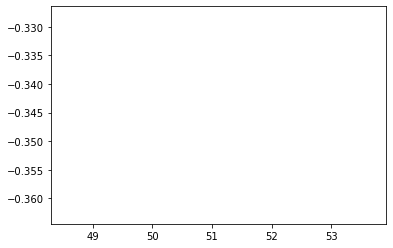

In [4]:
from astropy.io import fits

infile='/home/dario/FIFI-LS/Calibration/OC9T/wavcal/Reduced/B2_130_GC23_0.fits'
with fits.open(infile) as hdul:
    hdul.info()
    wave = hdul['wave'].data
    specs=hdul['specs'].data
    
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

print(np.shape(specs), np.shape(wave))
i,j = 14,11
plt.plot(wave[:,j,i],specs[:,i,j])
#print(specs[:,i,j])

### Check on data reduction

In [5]:
# Plot ramps ?
rootdir = '/home/dario/FIFI-LS/Calibration/OC9Q/wavcal/'
#infile = rootdir+'/20220526_174859/04446_002112_GC11-G_STRT_B-232500_sw.fits'
infile = rootdir+'/20220526_174859/01018_195444_GC4-G_STRT_B-892700_sw.fits'
with fits.open(infile) as hdul:
    header = hdul[1].header
    print(header)
    data = hdul['FIFILS_rawdata'].data
    
#print(type(data))

XTENSION= 'BINTABLE'           / binary table extension                         BITPIX  =                    8 / 8-bit bytes                                    NAXIS   =                    2 / 2-dimensional binary table                     NAXIS1  =                  952 / width of table in bytes                        NAXIS2  =                  512 / number of rows in table                        PCOUNT  =                    0 / size of special data area                      GCOUNT  =                    1 / one data group (required keyword)              TFIELDS =                    2 / number of fields in each row                   TTYPE1  = 'HEADER  '           / label for field   1                            TFORM1  = '8I      '           / data format of field: 2-byte INTEGER           TTYPE2  = 'DATA    '           / label for field   2                            TFORM2  = '468I    '           / data format of field: 2-byte INTEGER           EXTNAME = 'FIFILS_rawdata'     / name of

In [6]:
from fifipy.io import readData
rootdir = '/home/dario/FIFI-LS/Calibration/OC9Q/wavcal/'
infile = rootdir+'/20220526_174859/01018_195444_GC4-G_STRT_B-892700_sw.fits'
#infile = rootdir + '../20220526_174859/01217_200841_GC5-G_STRT_B-1272300_sw.fits'
aor, hk, gratpos, flux = readData(infile)


(1, 512, 16, 25)


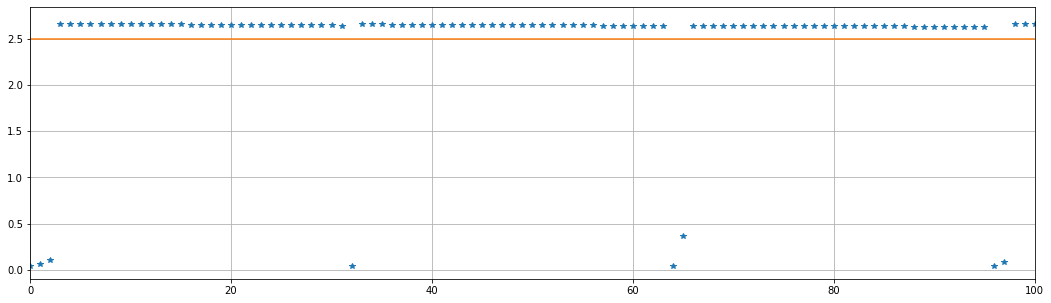

In [13]:
fig,ax = plt.subplots(figsize=(18,5))
print(np.shape(flux))
plt.plot(flux[0,:,14,11],'*')
plt.plot([0,100],[2.5,2.5])
plt.xlim(0,100)
plt.grid()

##  Step 5. Fit the parameters

- For each case, run first the calibration with all free parameters (ISOFF is treated like a Gaussian with 3 params).
- Then fix the parameters to the best values except for ISOFF.
- Run the fit for each spaxel independently.

### R 105

Number of files  13


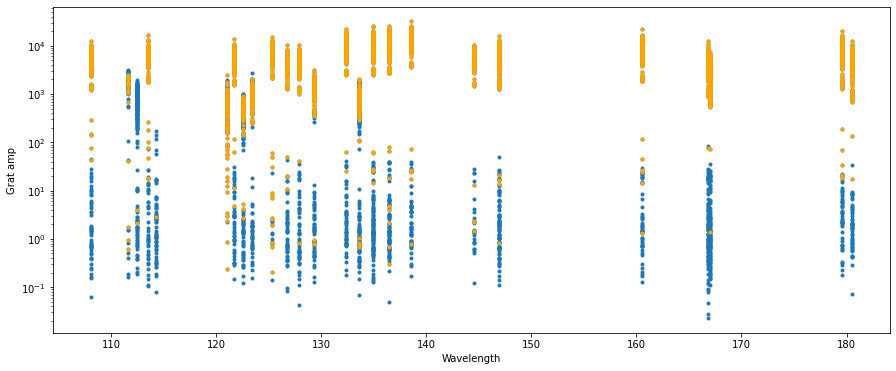

Number of files  13


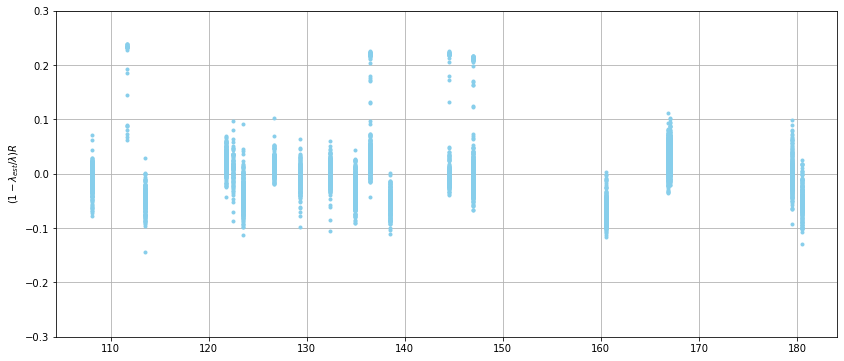

NP =  14.360191869667876
g0 =  0.11715788414657742
a  =  426.4902309222501
PS =  0.0005845539681338776
QS =  1.957492118481639e-06
QOFF =  6.720223394958033

ai =  6.367685634158306
bi =  -162.0400219034095
ci =  1150805.8091568234


In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
from fifipy.wavecal import selectFiles
from fifipy.wavecal import computeWavCalTot
from fifipy.wavecal import plotQualityFit

rootdir = '/home/dario/FIFI-LS/Calibration/OC9T/wavcal/Reduced/'
channel = 'R'
order = '1'
dichroic = '105'
modules, pixel, wavepos, gerrpos, gratpos, gratamp, waveok, nfile = selectFiles(rootdir,channel, order, dichroic)
fig = plt.subplots(figsize=(15,6))
plt.plot(wavepos, gratamp,'.')
idx = (gerrpos < 100) 
plt.plot(wavepos[idx], gratamp[idx],'.',color='orange')
plt.ylabel('Grat amp')
plt.xlabel('Wavelength')
plt.yscale('log')
plt.show()

# Total fit
channel = 'R'
order = 1
dichroic = 105
idx = (gratamp > 80) & (gerrpos < 150) & (waveok == 1) 
out = computeWavCalTot(pixel[idx], modules[idx], wavepos[idx], gratpos[idx], channel, order, dichroic)
g0,NP,a,ai,bi,ci,PS,QOFF,QS = out
plotQualityFit(rootdir, 'R', '105', g0, NP, a, ai, bi, ci, PS, QS, QOFF)

# Printout variables
print('NP = ', NP)
print('g0 = ', g0)
print('a  = ', a)
print('PS = ', PS)
print('QS = ', QS)
print('QOFF = ', QOFF)
print('')
print('ai = ',ai)
print('bi = ',bi)
print('ci = ',ci)

ISOFF = [1150744.922,
1150884.066,nan,1151217.510,1151402.285,
1150118.032,1150172.988,1150266.925,1150355.270,
nan,1149743.850,1149739.552,1149752.264,
1149766.262,1149908.570,1150011.156,1149897.566,
1149829.248,1149758.048,1149891.636,nan,
1150545.109,1150394.400,1150242.372,1150362.636]
[25 26 27 28 29 19 20 21 22 23 13 14 15 16 17  7  8  9 10 11  1  2  3  4
  5]
ISOFF =  [1150744.92156277 1150884.06599327 1151057.39795084 1151217.50992819
 1151402.28521079 1150118.03227425 1150172.98838028 1150266.9245035
 1150355.26959101 1150529.52607203 1149743.84950352 1149739.55211537
 1149752.2644917  1149766.26204484 1149908.56966025 1150011.15639476
 1149897.56576285 1149829.24797464 1149758.04804785 1149891.63646956
 1150702.17938747 1150545.10896386 1150394.40025353 1150242.3719799
 1150362.63590713]


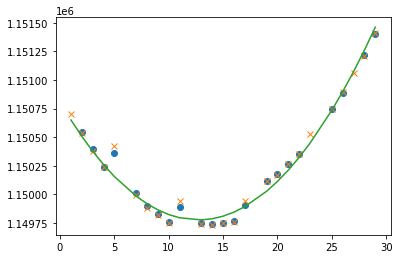

In [6]:
import numpy as np
from fifipy.wavecal import computeWavCal

# Fixed parameters
NP =  14.360191869667876
g0 =  0.11715788414657742
a  =  426.4902309222501
PS =  0.0005845539681338776
QS =  1.957492118481639e-06
QOFF =  6.720223394958033


# Fix the g
module = np.arange(25)
slitPos = 25 - 6 * (module // 5) + module % 5
g = g0 * (1 - 0.5 * ((slitPos - NP)/a)**2)

idx = (gratamp > 100) & (gerrpos < 100) & (waveok == 1) 
out = computeWavCal(pixel[idx], modules[idx], wavepos[idx], gratpos[idx]
                    ,'R',1
                    ,fixPS= PS
                    ,fixQS= QS
                    ,fixQOFF= QOFF
                    ,fixg = g
)
g_,gamma,QOFF_, PS_,QS_, ISOFF = out
print("ISOFF = [", end='')
for i, isoff in enumerate(ISOFF):
    if i < 24:
        if i % 4 == 0:
            print('{0:.3f},'.format(isoff))
        else:
            print('{0:.3f},'.format(isoff),end='')
    else:
        print('{0:.3f}]'.format(isoff))
#ai,bi,ci = fitISOFF(ISOFF, channel, dichroic, order)

# Plot ISOFF vs fit
ai =  6.367685634158306
bi =  -162.0400219034095
ci =  1150805.8091568234



red105 = [ -7.82734595,    6.48103643,   15.37344189,   47.39558183,   54.25017651,
              -87.78073561,  -57.87672198,  -57.02387395,  -30.75647953,  -82.13171852,
               38.17407445,   53.9293801 ,   62.15816713,   82.60265586,  -51.04419029,
               -6.0626937,   36.28682384,   42.49162215,   70.33355788, -148.78530207,
              -52.04256692 , -29.12922045,   -4.73520485,   20.72545992, -268.51481606]

x = slitPos
s = np.argsort(x)
plt.plot(slitPos, ISOFF, 'o')
print(x)
fitISOFF = ai*x*x+bi*x+ci - red105
plt.plot(x, fitISOFF, 'x' )
x = x[s]
plt.plot(x, ai*x*x+bi*x+ci)

# Substitute NaNs
idx = np.isfinite(ISOFF)
if np.sum(~idx) > 0:
    ISOFF[~idx] = fitISOFF[~idx]
print('ISOFF = ', ISOFF)
# 
ISF = 1
gamma = 0.0167200
R105_pars = [g0,NP,a,ISF,gamma,PS,QOFF,QS,ISOFF]


### R 130

Number of files  12
Number of files  12


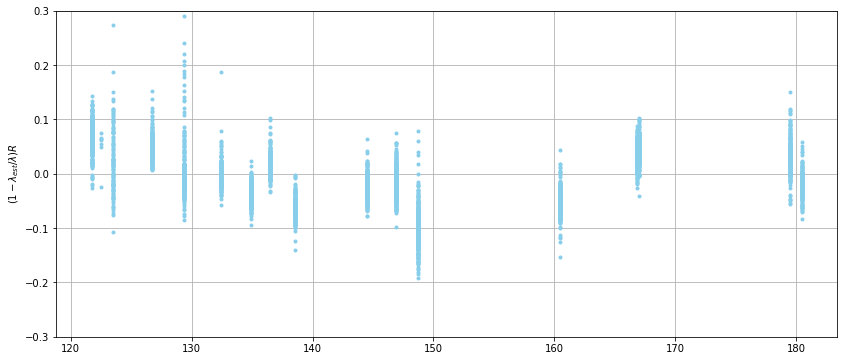

NP =  14.333449607957283
g0 =  0.1171458863822211
a  =  430.10387600290636
PS =  0.0005853531035653023
QS =  1.4024763576971664e-06
QOFF =  4.879710433845668

ai =  6.219814178748968
bi =  -157.27572671162665
ci =  1151084.6618711362


In [7]:
%matplotlib inline
import matplotlib.pyplot as plt
from fifipy.wavecal import selectFiles
from fifipy.wavecal import computeWavCalTot
from fifipy.wavecal import plotQualityFit

rootdir = '/home/dario/FIFI-LS/Calibration/OC9T/wavcal/Reduced/'
channel = 'R'
order = '1'
dichroic = '130'
modules, pixel, wavepos, gerrpos, gratpos, gratamp, waveok, nfile = selectFiles(rootdir,channel, order, dichroic)

# Total fit
channel = 'R'
order = 1
dichroic = 130
idx = (gratamp > 80) & (gerrpos < 150) & (waveok == 1) 
out = computeWavCalTot(pixel[idx], modules[idx], wavepos[idx], gratpos[idx], channel, order,dichroic)
g0,NP,a,ai,bi,ci,PS,QOFF,QS = out
plotQualityFit(rootdir, 'R', '130', g0, NP, a, ai, bi, ci, PS, QS, QOFF)

# Printout variables
print('NP = ', NP)
print('g0 = ', g0)
print('a  = ', a)
print('PS = ', PS)
print('QS = ', QS)
print('QOFF = ', QOFF)
print('')
print('ai = ',ai)
print('bi = ',bi)
print('ci = ',ci)

ISOFF = [1151047.495,
1151181.761,nan,1151511.395,1151700.915,
1150428.980,1150489.726,1150591.395,1150670.875,
nan,1150065.150,1150054.889,1150077.726,
1150090.326,1150204.424,1150307.291,1150195.155,
1150139.984,1150071.552,1150181.098,nan,
1150830.634,1150691.329,1150547.944,1150632.819]
[25 26 27 28 29 19 20 21 22 23 13 14 15 16 17  7  8  9 10 11  1  2  3  4
  5]
ISOFF =  [1151047.49459881 1151181.76057468 1151353.93011162 1151511.39463386
 1151700.91463581 1150428.98031615 1150489.72620521 1150591.39490519
 1150670.87501546 1150826.59919692 1150065.14960874 1150054.88868721
 1150077.72554419 1150090.32627687 1150204.42422303 1150307.29107473
 1150195.1552788  1150139.98440635 1150071.55237672 1150181.09819262
 1150981.481324   1150830.633783   1150691.32906525 1150547.94435533
 1150632.81852918]


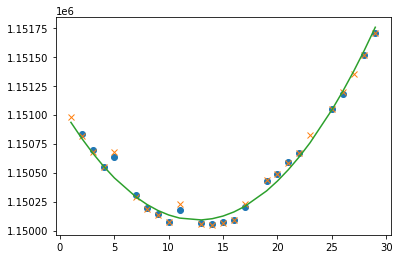

In [8]:
import numpy as np
from fifipy.wavecal import computeWavCal

# Fixed parameters
NP =  14.333449607957283
g0 =  0.1171458863822211
a  =  430.10387600290636
PS =  0.0005853531035653023
QS =  1.4024763576971664e-06
QOFF =  4.879710433845668

# Fix the g
module = np.arange(25)
slitPos = 25 - 6 * (module // 5) + module % 5
g = g0 * (1 - 0.5 * ((slitPos - NP)/a)**2)

idx = (gratamp > 100) & (gerrpos < 100) & (waveok == 1) 
out = computeWavCal(pixel[idx], modules[idx], wavepos[idx], gratpos[idx]
                    ,'R',1
                    ,fixPS= PS
                    ,fixQS= QS
                    ,fixQOFF= QOFF
                    ,fixg = g
)
g_,gamma,QOFF_, PS_,QS_, ISOFF = out
print("ISOFF = [", end='')
for i, isoff in enumerate(ISOFF):
    if i < 24:
        if i % 4 == 0:
            print('{0:.3f},'.format(isoff))
        else:
            print('{0:.3f},'.format(isoff),end='')
    else:
        print('{0:.3f}]'.format(isoff))

# Plot ISOFF vs fit
i =  6.219814178748968
bi =  -157.27572671162665
ci =  1151084.6618711362

red130 = [ -12.70859072,    7.50024661,   18.53167461,   41.46400465,   52.7757175,
              -95.78015715,  -56.53938436,  -54.24399594,  -33.75992799,  -68.99733959,
               31.27967525,   53.60554151,   58.10103624,   71.69960587,  -22.11761283,
               -4.64846212 ,  38.77585613,   42.34325365,   60.40053434, -118.02749666,
              -47.8753654 ,  -24.45939546,   -4.54977914,    8.74871326, -223.38722927]

x = slitPos
s = np.argsort(x)
plt.plot(slitPos, ISOFF, 'o')
print(x)
fitISOFF = ai*x*x+bi*x+ci - red130
plt.plot(x, fitISOFF, 'x' )
x = x[s]
plt.plot(x, ai*x*x+bi*x+ci)

# Substitute NaNs
idx = np.isfinite(ISOFF)
if np.sum(~idx) > 0:
    ISOFF[~idx] = fitISOFF[~idx]
print('ISOFF = ', ISOFF)
# 
ISF = 1
gamma = 0.0167200
R130_pars = [g0,NP,a,ISF,gamma,PS,QOFF,QS,ISOFF]


### B 1

Number of files  13
Number of files  13


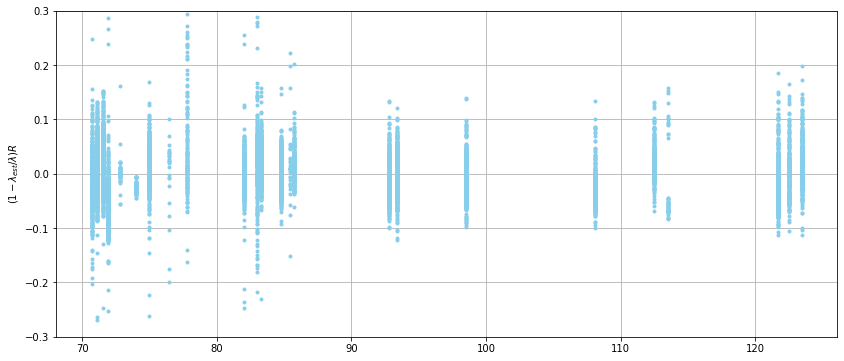

NP =  14.506372952943561
g0 =  0.08265554861421992
a  =  890.2125276452379
PS =  0.0005596259389376455
QS =  9.429765515744923e-06
QOFF =  6.836878310641984

ai =  1.986089697391362
bi =  -51.53769854181033
ci =  1075386.1793062973


In [9]:
%matplotlib inline
import matplotlib.pyplot as plt
from fifipy.wavecal import selectFiles
from fifipy.wavecal import computeWavCalTot
from fifipy.wavecal import plotQualityFit

rootdir = '/home/dario/FIFI-LS/Calibration/OC9T/wavcal/Reduced/'
channel = 'B'
order = '1'
dichroic = '130'
modules, pixel, wavepos, gerrpos, gratpos, gratamp, waveok, nfile = selectFiles(rootdir,channel, order, dichroic)

# Total fit
channel = 'B'
order = 1
dichroic = 130
idx = (gratamp > 80) & (gerrpos < 150) & (waveok == 1) 
out = computeWavCalTot(pixel[idx], modules[idx], wavepos[idx], gratpos[idx], channel, order, dichroic)
g0,NP,a,ai,bi,ci,PS,QOFF,QS = out
plotQualityFit(rootdir, 'B1', '130', g0, NP, a, ai, bi, ci, PS, QS, QOFF)
# Printout variables
print('NP = ', NP)
print('g0 = ', g0)
print('a  = ', a)
print('PS = ', PS)
print('QS = ', QS)
print('QOFF = ', QOFF)
print('')
print('ai = ',ai)
print('bi = ',bi)
print('ci = ',ci)

ISOFF = [1075639.828,
1075405.826,1075405.232,1075422.274,1075174.932,
1075332.980,1075153.232,1075169.319,1075159.937,
1074983.439,1075225.134,1075067.868,1075019.577,
1075024.505,1074909.653,1075198.469,1075046.251,
1075025.665,1075014.341,1074886.735,1075460.921,
1075283.085,1075203.056,1075201.296,1075048.791]
[25 26 27 28 29 19 20 21 22 23 13 14 15 16 17  7  8  9 10 11  1  2  3  4
  5]
ISOFF =  [1075639.82825347 1075405.82621711 1075405.23179918 1075422.27358459
 1075174.93161829 1075332.98046618 1075153.2320544  1075169.31940092
 1075159.93728699 1074983.43901218 1075225.13367156 1075067.86826388
 1075019.57673436 1075024.50522084 1074909.65341134 1075198.46919034
 1075046.25138401 1075025.66507149 1075014.34072355 1074886.73498334
 1075460.92065157 1075283.08462052 1075203.05553619 1075201.29556658
 1075048.79139808]


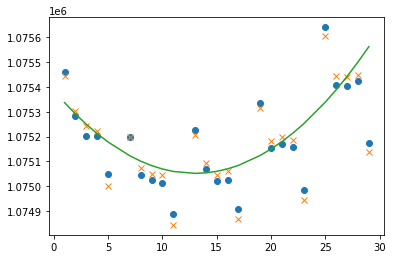

In [10]:
import numpy as np
from fifipy.wavecal import computeWavCal

# Fixed parameters
NP =  14.506372952943561
g0 =  0.08265554861421992
a  =  890.2125276452379
PS =  0.0005596259389376455
QS =  9.429765515744923e-06
QOFF =  6.836878310641984

# Fix the g
module = np.arange(25)
slitPos = 25 - 6 * (module // 5) + module % 5
g = g0 * (1 - 0.5 * ((slitPos - NP)/a)**2)

idx = (gratamp > 100) & (gerrpos < 100) & (waveok == 1) 
out = computeWavCal(pixel[idx], modules[idx], wavepos[idx], gratpos[idx]
                    ,'B',1
                    ,fixPS= PS
                    ,fixQS= QS
                    ,fixQOFF= QOFF
                    ,fixg = g
)
g_,gamma,QOFF_, PS_,QS_, ISOFF = out
print("ISOFF = [", end='')
for i, isoff in enumerate(ISOFF):
    if i < 24:
        if i % 4 == 0:
            print('{0:.3f},'.format(isoff))
        else:
            print('{0:.3f},'.format(isoff),end='')
    else:
        print('{0:.3f}]'.format(isoff))

# Plot ISOFF vs fit
ai =  1.986089697391362
bi =  -51.53769854181033
ci =  1075386.1793062973


blue1 = [-263.92944121,  -53.59084654,    1.16697799,   51.19513828,  422.65026353,
             -189.63033763,  -33.17725668,  -19.96267952,   26.01302266,  307.31828786,
             -156.31979898,  -37.76920495,   14.25657713,    9.02851029,  216.42404114,
              -75.57154681,   28.56399698,   33.54483603,   24.91445915,  215.17805003,
             -108.48468372,  -12.59286879,    6.90170244,  -10.74710888,  175.93175233]

x = slitPos
s = np.argsort(x)
plt.plot(slitPos, ISOFF, 'o')
print(x)
fitISOFF = ai*x*x+bi*x+ci - blue1
plt.plot(x, fitISOFF, 'x' )
x = x[s]
plt.plot(x, ai*x*x+bi*x+ci)

# Substitute NaNs
idx = np.isfinite(ISOFF)
if np.sum(~idx) > 0:
    ISOFF[~idx] = fitISOFF[~idx]
print('ISOFF = ', ISOFF)
# 
ISF = 1
gamma = 0.0089008
B1_pars = [g0,NP,a,ISF,gamma,PS,QOFF,QS,ISOFF ]


### B 2

Number of files  15
Number of files  15


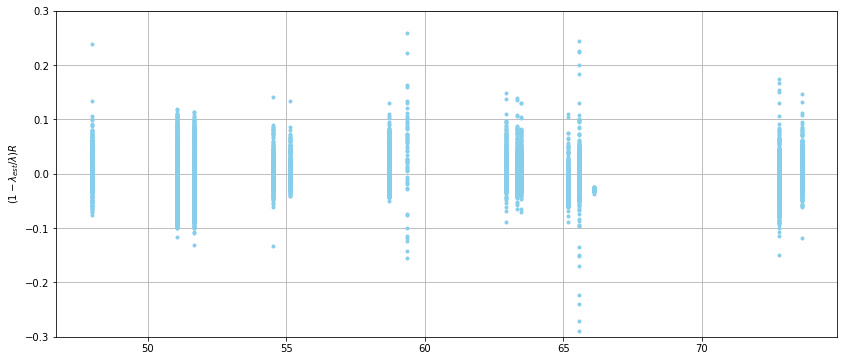

NP =  14.708459538197905
g0 =  0.0826609088206504
a  =  835.958371201064
PS =  0.0005613021268403491
QS =  6.984243036339273e-06
QOFF =  6.405096480720468

ai =  1.9879102163826472
bi =  -52.588773249181116
ci =  1075319.333165484


In [11]:
%matplotlib inline
import matplotlib.pyplot as plt
from fifipy.wavecal import selectFiles
from fifipy.wavecal import computeWavCalTot
from fifipy.wavecal import plotQualityFit

rootdir = '/home/dario/FIFI-LS/Calibration/OC9T/wavcal/Reduced/'
channel = 'B'
order = '2'
dichroic = '130'
modules, pixel, wavepos, gerrpos, gratpos, gratamp, waveok, nfile = selectFiles(rootdir,channel, order, dichroic)

# Total fit
channel = 'B'
order = 2
dichroic = 130
idx = (gratamp > 80) & (gerrpos < 150) & (waveok == 1) 
out = computeWavCalTot(pixel[idx], modules[idx], wavepos[idx], gratpos[idx], channel, order,dichroic)
g0,NP,a,ai,bi,ci,PS,QOFF,QS = out
plotQualityFit(rootdir, 'B2', '130', g0, NP, a, ai, bi, ci, PS, QS, QOFF)
# Printout variables
print('NP = ', NP)
print('g0 = ', g0)
print('a  = ', a)
print('PS = ', PS)
print('QS = ', QS)
print('QOFF = ', QOFF)
print('')
print('ai = ',ai)
print('bi = ',bi)
print('ci = ',ci)

ISOFF = [1075438.358,
1075313.293,1075319.409,1075328.880,1075057.773,
1075169.633,1075079.779,1075110.370,1075095.267,
1074860.078,1075078.093,1074987.947,1074956.689,
1074960.357,1074793.550,1075074.353,1074977.012,
1074952.805,1074945.381,1074760.780,1075343.240,
1075206.560,1075152.229,1075135.332,1074915.056]
[25 26 27 28 29 19 20 21 22 23 13 14 15 16 17  7  8  9 10 11  1  2  3  4
  5]
ISOFF =  [1075438.35823788 1075313.29274798 1075319.40900033 1075328.88022324
 1075057.77271197 1075169.63259396 1075079.77936824 1075110.36961607
 1075095.26722344 1074860.07847199 1075078.09272237 1074987.94748464
 1074956.68943872 1074960.35724216 1074793.55030235 1075074.35311012
 1074977.01229989 1074952.8054445  1074945.38147152 1074760.7803068
 1075343.24035928 1075206.55980539 1075152.22877719 1075135.33165175
 1074915.0563522 ]


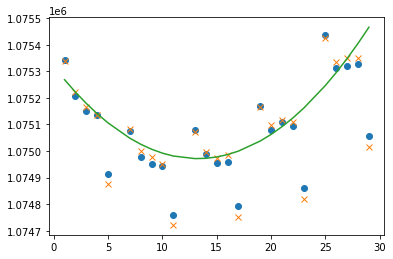

In [12]:
import numpy as np
from fifipy.wavecal import computeWavCal

# Fixed parameters
NP =  14.708459538197905
g0 =  0.0826609088206504
a  =  835.958371201064
PS =  0.0005613021268403491
QS =  6.984243036339273e-06
QOFF =  6.405096480720468

# Fix the g
module = np.arange(25)
slitPos = 25 - 6 * (module // 5) + module % 5
g = g0 * (1 - 0.5 * ((slitPos - NP)/a)**2)

idx = (gratamp > 100) & (gerrpos < 100) & (waveok == 1) 
out = computeWavCal(pixel[idx], modules[idx], wavepos[idx], gratpos[idx]
                    ,'B',2
                    ,fixPS= PS
                    ,fixQS= QS
                    ,fixQOFF= QOFF
                    ,fixg = g
)
g_,gamma,QOFF_, PS_,QS_, ISOFF = out
print("ISOFF = [", end='')
for i, isoff in enumerate(ISOFF):
    if i < 24:
        if i % 4 == 0:
            print('{0:.3f},'.format(isoff))
        else:
            print('{0:.3f},'.format(isoff),end='')
    else:
        print('{0:.3f}]'.format(isoff))

# Plot ISOFF vs fit
ai =  1.9879102163826472
bi =  -52.588773249181116
ci =  1075319.333165484

blue2 = [-1.80111492e+02, -4.09611668e+01,  1.78797557e-02,  5.33911505e+01,
              4.51898768e+02, -1.28648267e+02, -3.41402874e+01, -2.58367960e+01,
              1.51806221e+01,  3.40600043e+02, -1.00297089e+02, -2.52445624e+01,
              4.35994998e+00,  3.34233424e+00,  2.48134145e+02, -3.43214702e+01,
              2.64531668e+01,  2.99021981e+01,  4.11197888e+01,  2.59380351e+02,
             -6.88399816e+01, -1.68668733e-01,  1.23190431e+01,  3.38400050e+00,
              2.28956503e+02]
x = slitPos
s = np.argsort(x)
plt.plot(slitPos, ISOFF, 'o')
print(x)
fitISOFF = ai*x*x+bi*x+ci - blue2
plt.plot(x, fitISOFF, 'x' )
x = x[s]
plt.plot(x, ai*x*x+bi*x+ci)

# Substitute NaNs
idx = np.isfinite(ISOFF)
if np.sum(~idx) > 0:
    ISOFF[~idx] = fitISOFF[~idx]
print('ISOFF = ', ISOFF)
# 
ISF = 1
gamma = 0.0089008
B2_pars = [g0,NP,a,ISF,gamma,PS,QOFF,QS,ISOFF ]

# Output

In [13]:
# Print the parameters (Old style)
print(',2208,,,')
header = ',Red D105,    Red D130,   Blue 1st Order,Blue 2nd Order'
print(header)
parametes  = ['g0','NP','a','ISF','gamma','PS','QOFF','QS','ISOFF'] 
for r105, r130, b1, b2 in zip(R105_pars[:-1], R130_pars[:-1], B1_pars[:-1], B2_pars[:-1]):
    print(',{0:.5e}, {1:.5e}, {2:.5e}, {3:.5e}'.format(r105, r130, b1 ,b2))
for i, (r105, r130, b1, b2) in enumerate(zip(R105_pars[-1], R130_pars[-1], B1_pars[-1], B2_pars[-1])):
    print(',{1:.3f}, {2:.3f}, {3:.3f}, {4:.3f}'.format(i,r105, r130, b1, b2))

,2208,,,
,Red D105,    Red D130,   Blue 1st Order,Blue 2nd Order
,1.17158e-01, 1.17146e-01, 8.26555e-02, 8.26609e-02
,1.43602e+01, 1.43334e+01, 1.45064e+01, 1.47085e+01
,4.26490e+02, 4.30104e+02, 8.90213e+02, 8.35958e+02
,1.00000e+00, 1.00000e+00, 1.00000e+00, 1.00000e+00
,1.67200e-02, 1.67200e-02, 8.90080e-03, 8.90080e-03
,5.84554e-04, 5.85353e-04, 5.59626e-04, 5.61302e-04
,6.72022e+00, 4.87971e+00, 6.83688e+00, 6.40510e+00
,1.95749e-06, 1.40248e-06, 9.42977e-06, 6.98424e-06
,1150744.922, 1151047.495, 1075639.828, 1075438.358
,1150884.066, 1151181.761, 1075405.826, 1075313.293
,1151057.398, 1151353.930, 1075405.232, 1075319.409
,1151217.510, 1151511.395, 1075422.274, 1075328.880
,1151402.285, 1151700.915, 1075174.932, 1075057.773
,1150118.032, 1150428.980, 1075332.980, 1075169.633
,1150172.988, 1150489.726, 1075153.232, 1075079.779
,1150266.925, 1150591.395, 1075169.319, 1075110.370
,1150355.270, 1150670.875, 1075159.937, 1075095.267
,1150529.526, 1150826.599, 1074983.439, 1074860.078

# New Output

In [14]:
date = '20220801'
print('# 2202')
channel = 'R105'
fmt = '{0:s} {1:s} {2:.9f} {3:.8f} {4:.7f} {5:.9f} {6:.9f} {7:.5e} '+\
'{8:.3f} {9:.3f} {10:.3f} {11:.3f} {12:.3f} {13:.3f} {14:.3f} {15:.3f} {16:.3f} {17:.3f} '+\
'{18:.3f} {19:.3f} {20:.3f} {21:.3f} {22:.3f} {23:.3f} {24:.3f} {25:.3f} {26:.3f} {27:.3f} '+\
'{28:.3f} {29:.3f} {30:.3f} {31:.3f} {32:.3f}'

#print(fmt.format(date, channel, R105_pars[:3], R105_pars[5:8], np.array(R105_pars[-1])))
channels = ['R105', 'R130', 'B1  ', 'B2  ']
data = [R105_pars, R130_pars, B1_pars, B2_pars]

for channel, d in zip(channels, data):
    print('{0:s} {1:s} '.format(date, channel), end='')
    print('{0:.9f}  {1:.8f}  {2:.7f}  '.format(d[0], d[1], d[2]), end='')
    print('{0:.9f}  {1:.9f}  {2:.5e}  '.format(d[5], d[6], d[7]), end='')
    for r in d[-1]:
        print('{0:.3f}  '.format(r), end='')
    print()

# 2202
20220801 R105 0.117157884  14.36019187  426.4902309  0.000584554  6.720223395  1.95749e-06  1150744.922  1150884.066  1151057.398  1151217.510  1151402.285  1150118.032  1150172.988  1150266.925  1150355.270  1150529.526  1149743.850  1149739.552  1149752.264  1149766.262  1149908.570  1150011.156  1149897.566  1149829.248  1149758.048  1149891.636  1150702.179  1150545.109  1150394.400  1150242.372  1150362.636  
20220801 R130 0.117145886  14.33344961  430.1038760  0.000585353  4.879710434  1.40248e-06  1151047.495  1151181.761  1151353.930  1151511.395  1151700.915  1150428.980  1150489.726  1150591.395  1150670.875  1150826.599  1150065.150  1150054.889  1150077.726  1150090.326  1150204.424  1150307.291  1150195.155  1150139.984  1150071.552  1150181.098  1150981.481  1150830.634  1150691.329  1150547.944  1150632.819  
20220801 B1   0.082655549  14.50637295  890.2125276  0.000559626  6.836878311  9.42977e-06  1075639.828  1075405.826  1075405.232  1075422.274  1075174.932  

In [15]:
# Write an output file with all the parameters [Old format]
rootdir = '/home/dario/FIFI-LS/Calibration/OC9T/wavcal/'
with open(rootdir+'parameters.csv', 'w') as f:
    f.write('date, channel, g0,NP,a,ISF,gamma,PS,QOFF,QS,')
    for i in range(1,25):
        f.write('ISOFF'+str(i)+',')
    f.write('ISOFF25\n')
    f.write('# 2208\n')
    for channel, pars in zip(['R105','R130','B1','B2'], [R105_pars, R130_pars, B1_pars, B2_pars]):
        f.write('20220801, '+channel)
        for p in pars[:-1]:
            f.write(', {0:.5e}'.format(p))
        for p in pars[-1]:
            f.write(', {0:.3f}'.format(p))
        f.write('\n')

In [16]:
rootdir = '/home/dario/FIFI-LS/Calibration/OC9T/wavcal/'
header = '# Date   ch   g0           NP           a            PS           QOFF         QS           ISOFF1       ISOFF2       ISOFF3       ISOFF4       ISOFF5       ISOFF6       ISOFF7       ISOFF8       ISOFF9       ISOFF10      ISOFF11      ISOFF12      ISOFF13      ISOFF14      ISOFF15      ISOFF16      ISOFF17      ISOFF18      ISOFF19      ISOFF20      ISOFF21      ISOFF22      ISOFF23      ISOFF24      ISOFF25'
date = '20220801'
channel = 'R105'

#print(fmt.format(date, channel, R105_pars[:3], R105_pars[5:8], np.array(R105_pars[-1])))
channels = ['R105', 'R130', 'B1  ', 'B2  ']
data = [R105_pars, R130_pars, B1_pars, B2_pars]

with open(rootdir+'parameters.txt', 'w') as f:
    f.write(header)
    f.write('\n')
    f.write('# 2208\n')
    for channel, d in zip(channels, data):
        f.write('{0:s} {1:s} '.format(date, channel))
        f.write('{0:.9f}  {1:.8f}  {2:.7f}  '.format(d[0], d[1], d[2]))
        f.write('{0:.9f}  {1:.9f}  {2:.5e}'.format(d[5], d[6], d[7]))
        for r in d[-1]:
            f.write('  {0:.3f}'.format(r))
        f.write('\n')
    